# Common Plots
The following examples show how to create some common visualizations of Madrigal data. Due to the 4D nature of the data, it is challenging to visualize all parts of the FoV simultaneously.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [14]:
filename = 'data/pfa20240108.001_lp_fit_01min.001.h5'

## RTI Plot
Range-Time-Intensity (RTI) plots are a common way to look at how profiles of a parameter change in time.

### The Most Basic

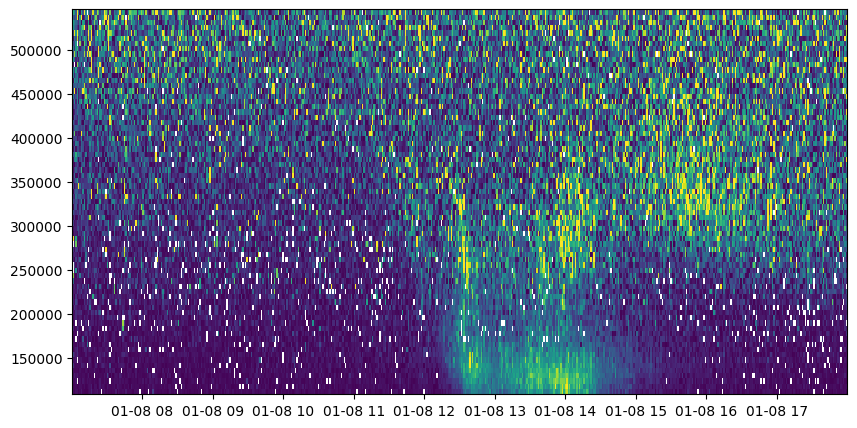

In [15]:
with h5py.File(filename, 'r') as h5:
    bidx = 'Array with beamid=63149 '
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

time = utime.astype('datetime64[s]')
fig = plt.figure(figsize=(10,5))
plt.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)


### A Scientifically Useful Plot
Now lets create the same plot as before but with intelligible axes and labels, a colorbar, ect.  This is probably the minimum you want to do for inclusion in a paper or presentation.

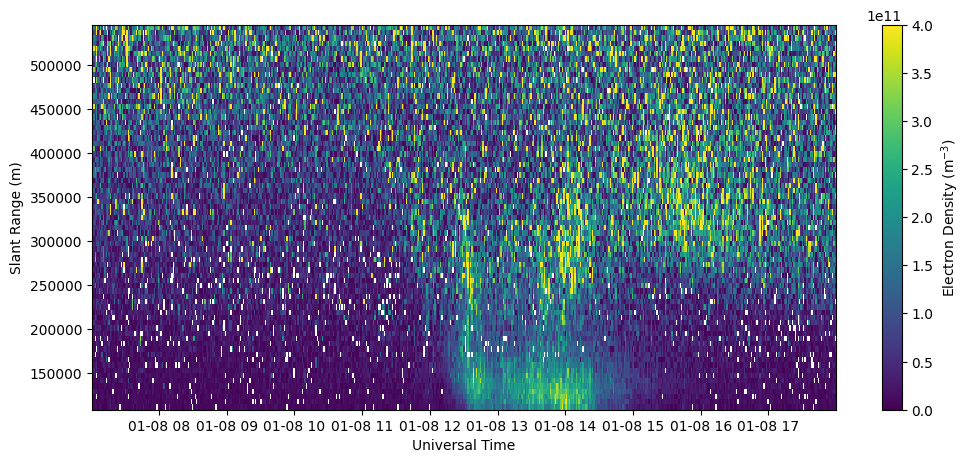

In [16]:
with h5py.File(filename, 'r') as h5:
    bidx = 'Array with beamid=63149 '
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

### Plotting a Specific Beam
Plot a specific beam by selecting the beam index (`bidx`) more carefully.  You can either select a particular beam by its beamcode, or choose a beam based on proximity to a particular azimuth/elevation (i.e., choose the highest elevation beam in the beam pattern).

['Array with beamid=63149 ' 'Array with beamid=63197 '
 'Array with beamid=63239 ' 'Array with beamid=63281 '
 'Array with beamid=63317 ' 'Array with beamid=63365 '
 'Array with beamid=63401 ' 'Array with beamid=63449 '
 'Array with beamid=64016 ' 'Array with beamid=64031 '
 'Array with beamid=64046 ' 'Array with beamid=64067 '
 'Array with beamid=64157 ' 'Array with beamid=64163 '
 'Array with beamid=64205 ' 'Array with beamid=64232 '
 'Array with beamid=64247 ' 'Array with beamid=64475 '
 'Array with beamid=64817 ' 'Array with beamid=64973 '
 'Array with beamid=65057 ' 'Array with beamid=65282 '
 'Array with beamid=65363 ']


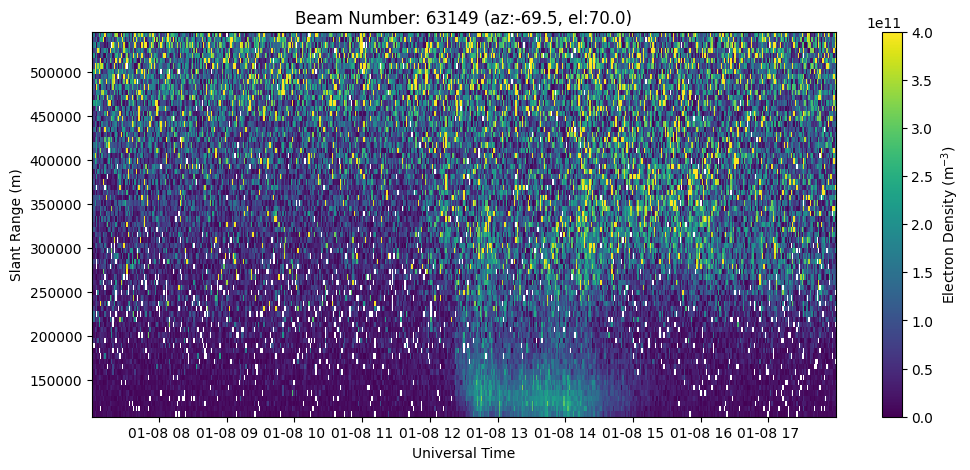

In [17]:
# Plot beam 64157
with h5py.File(filename, 'r') as h5:
    beamcodes = np.array(h5['Data/Array Layout'])
    print(beamcodes)
    bidx = 'Array with beamid=64157 '
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])
    
    azm = h5['Data/Array Layout']['Array with beamid=63149 ']['1D Parameters']['azm'][0]
    elm = h5['Data/Array Layout']['Array with beamid=63149 ']['1D Parameters']['elm'][0]
    beamid = h5['Data/Array Layout']['Array with beamid=63149 ']['1D Parameters']['beamid'][0]

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamid, azm, elm))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

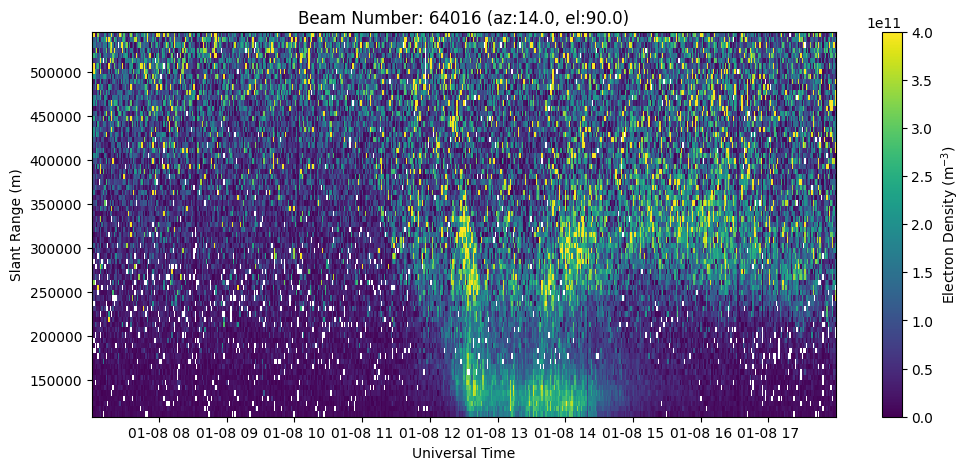

In [18]:
# Plot the highest elevation beam (vertical in this case)
with h5py.File(filename, 'r') as h5:
    elms = []
    bmid = []
    for key in h5['Data/Array Layout'].keys():
        elms.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        bmid.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['beamid'][0]))
    elms = np.array(elms)
    bmid = np.array(bmid)
    
    idx = np.argmax(elms)
    max_beam = bmid[idx]
    bidx = f'Array with beamid={max_beam} '

    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

    azm = h5['Data/Array Layout'][bidx]['1D Parameters']['azm'][0]
    elm = h5['Data/Array Layout'][bidx]['1D Parameters']['elm'][0]
    beamid = h5['Data/Array Layout'][bidx]['1D Parameters']['beamid'][0]


time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng, ne.T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamid, azm, elm))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

## Beam Position Plot
Create a polar plot of all beam positions for this particular experiment.

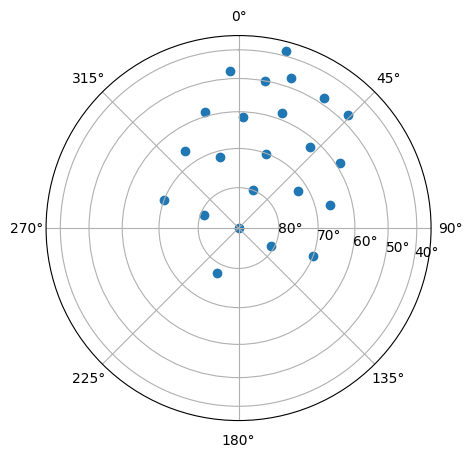

In [20]:
with h5py.File(filename, 'r') as h5:
    el = []
    az = []
    for key in h5['Data/Array Layout'].keys():
        el.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        az.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['azm'][0]))
    el = np.array(el)
    az = np.array(az)

# set up plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)
ax.set_rlabel_position(100.)
elticks = np.arange(20., 90., 10.)
ax.set_rticks(np.cos(elticks*np.pi/180.))
ax.set_yticklabels([str(int(el))+u'\N{DEGREE SIGN}' for el in elticks])

ax.scatter(az*np.pi/180., np.cos(el*np.pi/180.))